# Emoji Prediction using Deep Learning

####     

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)

In [3]:
df

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


### Over-sampling data

In [4]:
X = df["Tweet"].values
y = df["Label"].values

In [168]:
################ Random Over Sampling ###################

from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
#X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

#X = X.reshape(-1,)
X.shape
print(type(X))

################ END  Random Over Sampling ###################

<class 'scipy.sparse.csr.csr_matrix'>


In [167]:
################### FOR SMOTE #############################

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101)
X,y = os.fit_resample(X, y)

#from sklearn.feature_extraction.text import CountVectorizer
#import numpy as np

#X = vectorizer.inverse_transform(X)
#X = np.array(X, dtype=object)
#X = X.tolist()

print(type(X))

#X = [list(tweet) for tweet in X]

#################### SMOTE END #############################

<class 'scipy.sparse.csr.csr_matrix'>


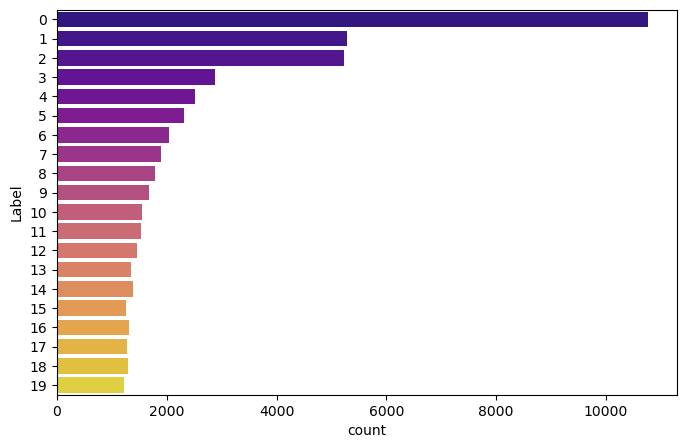

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(y="Label", data=df, palette="plasma")
plt.show()

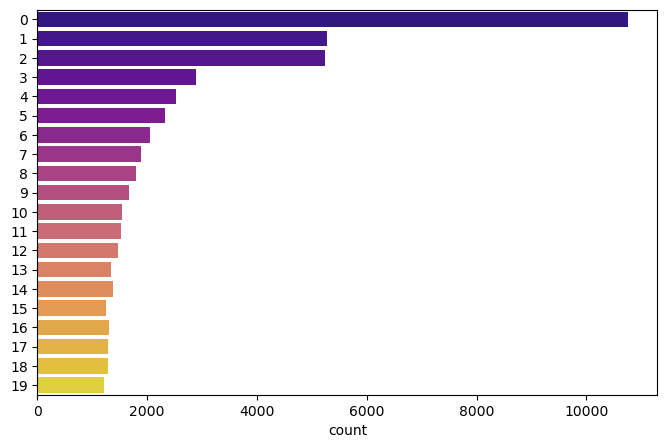

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(y=y, data = df, palette="plasma")
plt.show()

#   

### Tokenization

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [8]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['little throwback favourite person   water wall'
 'glam   yesterday kcon makeup   featherette'
 'democracy plaza wake stunning outcome decision   nbc news'
 'amp vilo   walt disney magic kingdom' '  galaxy far far away'
 'dinner fla tonight   panseared salmon couscous veggie salad yum dinner florida salmon'
 'fav senior game congrats beating west   west salem'
 'got formal best friend   phi mu jsu'
 'cause miss little homies throwback cousinlove   indiana university'
 'birthday kiss   madison wisconsin'] 

Sequences


[[25, 310, 1605, 288, 474, 622],
 [2748, 194, 15729, 526, 15730],
 [5764, 623, 898, 974, 7993, 2906, 4598, 1205],
 [6, 15731, 372, 57, 149, 228],
 [2225, 639, 639, 409],
 [106, 4599, 40, 15732, 2140, 15733, 3118, 1301, 1206, 106, 51, 2140],
 [373, 321, 94, 374, 6679, 127, 127, 2335],
 [16, 870, 13, 17, 788, 2907, 7994],
 [380, 65, 25, 1562, 310, 4167, 402, 21],
 [22, 624, 496, 687]]

In [9]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> love
Index:  2 ----> new
Index:  3 ----> day
Index:  4 ----> nt
Index:  5 ----> happy
Index:  6 ----> amp
Index:  7 ----> m
Index:  8 ----> time
Index:  9 ----> night


In [10]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 54697


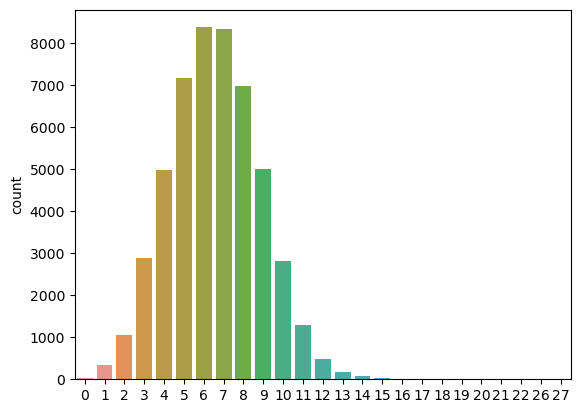

In [11]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#max_len=20
max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
#y_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [13]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[25, 310, 1605, 288, 474, 622]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   25  310 1605  288  474  622]]


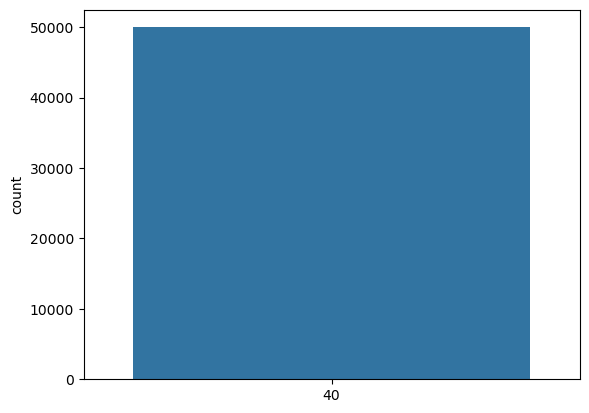

In [14]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [15]:
print(f"X_seqs_pd has {X_seqs_pd.shape[0]} samples.")
print(f"y has {y.shape[0]} samples.")

X_seqs_pd has 49985 samples.
y has 49985 samples.


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.2, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (39988, 40)
Training y Dim  (39988,)
Test X Dim  (9997, 40)
Test y Dim  (9997,)


In [17]:
X_test

array([[    0,     0,     0, ...,  1587,  2017,   127],
       [    0,     0,     0, ..., 41823, 10238,   127],
       [    0,     0,     0, ...,  7468,  4138,    54],
       ...,
       [    0,     0,     0, ...,   615,     6,   164],
       [    0,     0,     0, ...,     6,  3749,  3230],
       [    0,     0,     0, ...,   517,  1010,    51]], dtype=int32)

#   

## Deep Learning  Model using LSTMs

In [18]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

2023-01-08 18:42:25.382678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 20)            1093960   
                                                                 
 lstm (LSTM)                 (None, 40, 80)            32320     
                                                                 
 dropout (Dropout)           (None, 40, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
Total params: 1,146,460
Trainable params: 1,146,460
Non-

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [20]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [21]:
y_train_cat.shape, y_test_cat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39988, 20), (9997, 20), (39988, 40), (9997, 40), (39988,), (9997,))

In [22]:

batch_size=128
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/20
313/313 [==============================] - 55s 156ms/step - loss: 2.7534 - accuracy: 0.2084 - val_loss: 2.6329 - val_accuracy: 0.2287
Epoch 2/20
313/313 [==============================] - 48s 153ms/step - loss: 2.5189 - accuracy: 0.2655 - val_loss: 2.5219 - val_accuracy: 0.2743
Epoch 3/20
313/313 [==============================] - 40s 127ms/step - loss: 2.2826 - accuracy: 0.3259 - val_loss: 2.5670 - val_accuracy: 0.2735
Epoch 3: early stopping


In [23]:
#model.evaluate(X_test, y_test_cat, batch_size=batch_size)

In [24]:
X_test.shape, y_test.shape

((9997, 40), (9997,))

In [25]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,2.753351,0.208438,2.632935,0.228669
1,2.518898,0.265530,2.521887,0.274282
2,2.282581,0.325948,2.566993,0.273482


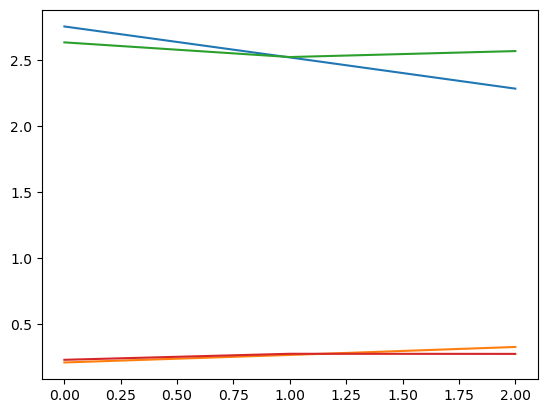

In [26]:
plt.plot(loss)

In [27]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

79/79 [==============================] - 3s 38ms/step - loss: 2.5670 - accuracy: 0.2735


[2.5669925212860107, 0.2734820544719696]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = np.argmax(model.predict(X_test), axis=-1)

#predict_x = model.predict(X_test)
#classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test, y_predict))

313/313 [==============================] - 6s 16ms/step
              precision    recall  f1-score   support

           0       0.30      0.76      0.43      2219
           1       0.05      0.00      0.01      1047
           2       0.26      0.53      0.35      1023
           3       0.00      0.00      0.00       562
           4       0.25      0.35      0.30       507
           5       0.00      0.00      0.00       464
           6       0.09      0.12      0.10       405
           7       0.14      0.01      0.01       389
           8       0.00      0.00      0.00       359
           9       0.00      0.00      0.00       333
          10       0.06      0.01      0.02       304
          11       0.28      0.48      0.35       282
          12       0.08      0.02      0.03       294
          13       0.00      0.00      0.00       265
          14       0.00      0.00      0.00       263
          15       0.00      0.00      0.00       259
          16       0.00  

/opt/anaconda3/envs/AraProje2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/AraProje2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/AraProje2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Doğrulama Tablosu',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Doğrulama Tablosu')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Gerçek Emojiler')
    plt.xlabel('Tahmini Emojiler')
    plt.tight_layout()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

Normalized confusion matrix


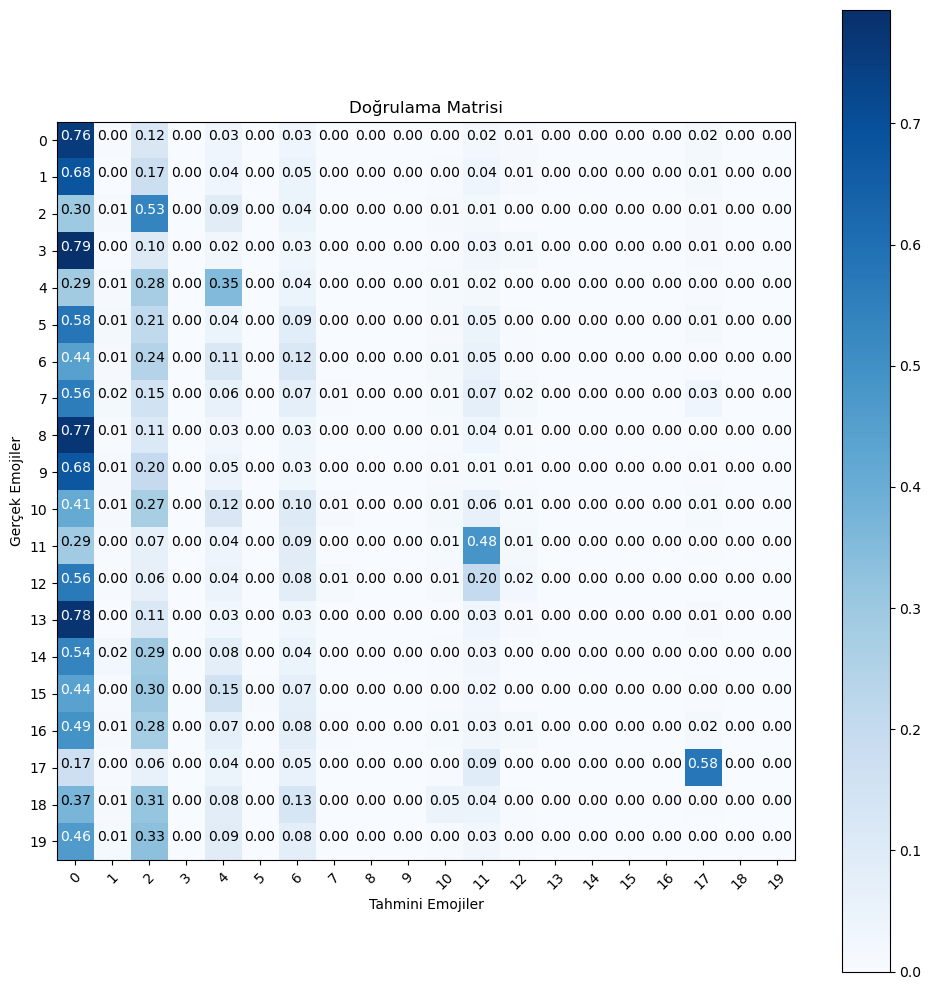

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğrulama Matrisi', normalize=True)


<Figure size 640x480 with 0 Axes>

#    

## Deep Learning  Model using Bidirectional-LSTMs

In [111]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 128)           7001344   
                                                                 
 bidirectional_2 (Bidirectio  (None, 40, 160)          133760    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40, 160)          154240    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 160)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 160)               0         
                                                      

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [113]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [120]:
y_train_cat.shape, y_test_cat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172128, 20), (43032, 20), (172128, 40), (43032, 40), (172128,), (43032,))

In [122]:
batch_size=64
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
         validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/15
2690/2690 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8314

ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 20) are incompatible


In [30]:
model.evaluate(X_test, y_test, batch_size=batch_size)

ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 20) are incompatible


In [28]:
loss = pd.DataFrame(model.history.history)
loss

""


In [29]:
plt.plot(loss[["loss","val_loss"]])
plt.show()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

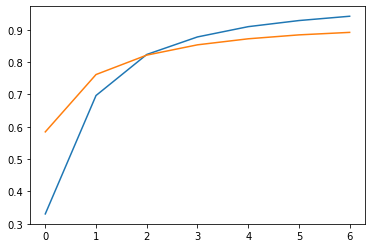

In [28]:
plt.plot(loss[["accuracy","val_accuracy"]])

## Model Evaluation

In [53]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40      3211
           1       0.69      0.64      0.66      3249
           2       0.84      0.73      0.78      3240
           3       0.79      0.85      0.82      3175
           4       0.93      0.93      0.93      3208
           5       0.82      0.88      0.85      3281
           6       0.89      0.93      0.91      3255
           7       0.87      0.94      0.90      3172
           8       0.93      0.93      0.93      3273
           9       0.84      0.94      0.89      3226
          10       0.96      0.89      0.92      3202
          11       0.93      0.98      0.95      3216
          12       0.95      0.97      0.96      3277
          13       0.95      0.97      0.96      3202
          14       0.95      0.97      0.96      3225
          15       0.95      0.98      0.97      3177
          16       0.94      0.96      0.95      3234
          17       0.97    

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = np.argmax(model.predict(X_test), axis=-1)

#predict_x = model.predict(X_test)
#classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test, y_predict))

In [9]:
plt.figure(figsize=(15,15))
mat = confusion_matrix(y_test, predictions)
sns.heatmap(flight_matrix, annot=True)                                                                   
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 1500x1500 with 0 Axes>

In [49]:
model.save("BLSTM.h6")

#  

# Results

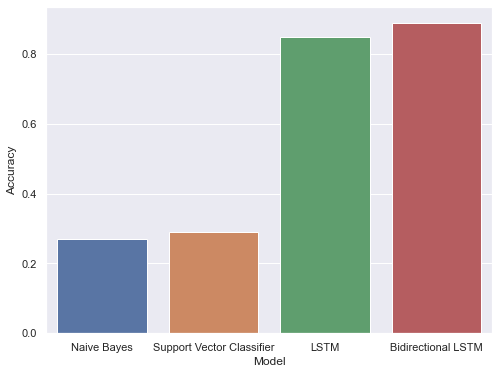

In [7]:
accuracy=[0.27,0.29,0.85,0.89]
labels=['Naive Bayes','Support Vector Classifier','LSTM','Bidirectional LSTM']


sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.show()